In [1]:
import matplotlib.pyplot as plt
import numpy as np
import discopy.util as util
import discopy.plot as plot
import discopy.geom as geom
from pathlib import Path
plt.style.use('ggplot')
import pandas as pd

In [12]:
report_path = '/gpfs/hsu/BH_disco_runs/0721cb_ecc0p2_1000_orbits/report.dat'
checkpoint_root = Path('/gpfs/hsu/BH_disco_runs/0721cb_ecc0p2_1000_orbits')
plot_dir = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_plots/0721cb_ecc0p2_1000_orbits/'
report = np.loadtxt(report_path)

In [13]:
# After changing snapshots
t = report[:,0]
mass = report[:,1]
energy = report[:,2]
radial_momentum = report[:,3]
angular_momentum = report[:,4]
vertical_momentum = report[:,5]
passive_scalar = report[:,6]
M1 = report[:,7]
M2 = report[:,8]
r1 = report[:,9]
r2 = report[:,10]
phi1 = report[:,11]
phi2 = report[:,12]
vr1 = report[:,13]
vr2 = report[:,14]
vphi1 = report[:,15]
vphi2 = report[:,16]
dM1 = report[:,17]
dM2 = report[:,18]
dJz_grv1 = report[:,19]
dJz_grv2 = report[:,20]
dJz_snk1 = report[:,21]
dJz_snk2 = report[:,22]
dPx_grv1 = report[:,23]
dPx_grv2 = report[:,24]
dPy_grv1 = report[:,25]
dPy_grv2 = report[:,26]
dPx_snk1 = report[:,27]
dPx_snk2 = report[:,28]
dPy_snk1 = report[:,29]
dPy_snk2 = report[:,30]
dK_grv1 = report[:,31]
dK_grv2 = report[:,32]
dK_snk1 = report[:,33]
dK_snk2 = report[:,34]
dMx_snk1 = report[:,35]
dMx_snk2 = report[:,36]
dMy_snk1 = report[:,37]
dMy_snk2 = report[:,38]
dSz_snk1 = report[:,39]
dSz_snk2 = report[:,40]
dU_grv1 = report[:,41]
dU_grv2 = report[:,42]
dU_snk1 = report[:,43]
dU_snk2 = report[:,44]
dLz_snk1 = report[:,45]
dLz_snk2 = report[:,46]
dUgas_snk1 = report[:,47]
dUgas_snk2 = report[:,48]


In [14]:
# G = 1
# dE1 = dU_grv1 + dK_grv1 + dU_snk1 + dK_snk1
# dE2 = dU_grv2 + dK_grv2 + dU_snk2 + dK_snk2
# dE = dE1 + dE2
# Edot = dE / (t[1] - t[0])

# dJ1 = dJz_grv1 + dJz_snk1
# dJ2 = dJz_grv2 + dJz_snk2
# dJ = dJ1 + dJ2
# Jdot = dJ / (t[1] - t[0])

# M1dot = dM1 / (t[1] - t[0])
# M2dot = dM2 / (t[1] - t[0])
# J1 = M1 * r1**2 * phi1dot
# J2 = M2 * r2**2 * phi2dot
# J = J1 + J2
# v1_sqared = r1**2 * phi1dot**2
# v2_sqared = r2**2 * phi2dot**2
# #Use r and phi to compute x and y and then separation
# E1 = 0.5 * M1 * v1_sqared - G * M1 * M2 / r1
# E2 = 0.5 * M2 * v2_sqared - G * M1 * M2 / r2
# E = E1 + E2

# # # Compute a dot
# # adot = -G/2 * ((M1dot * M2 + M1 * M2dot) / E - M1 * M2 * Edot / E**2)
# # edot = 1/G**2 * (1 + 2 * E * J**2 / (M1 * M2 * (M1 + M2)* G**2))**(-1/2) * ((Edot * J**2 + 2 * J * E * Jdot)
# #     * (M1**2 * M2 + M1 * M2**2) + (E * J**2) * (2 * M1 * M2 * (M1dot + M2dot)  + (M1dot * M2**2 + M1**2 * M2dot)))

In [15]:
G = 1
x1 = r1 * np.cos(phi1)
x2 = r2 * np.cos(phi2)
y1 = r1 * np.sin(phi1)
y2 = r2 * np.sin(phi2)
dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
rx = x1 - x2
ry = y1 - y2
r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
Phi1 = -G * M1 / r # Value of the potential emitted by 1 at location 2
Phi2 = -G * M2 / r # Value of the potential emitted by 2 at location 1

# phi1dot = dphi1 / (t[1] - t[0])
# phi2dot = (phi2[1] - phi2[0]) / (t[1] - t[0])
dU_grv1_test = Phi2 * dM1 # grv number is based on corresponding derivatives 
dU_grv2_test = Phi1 * dM2
gx1 = G * M1 * rx / r **3 # Toward M1
gx2 = -G * M2 * rx / r **3
gy1 = G * M1 * ry / r **3
gy2 = -G * M2 * ry / r **3
dU_snk1_test = - dMx_snk1 * gx2 - dMy_snk1 * gy2
dU_snk2_test = - dMx_snk2 * gx1 - dMy_snk2 * gy1
dU_test = dU_grv1_test + dU_grv2_test + dU_snk1_test + dU_snk2_test



In [16]:
dU_grv1, dU_grv1_test, dU_snk1, dU_snk1_test

(array([  0.        , -12.35902349, -20.1880218 , ...,  -0.22997742,
         -0.21698262,  -0.21966001]),
 array([-0.        , -0.00381283, -0.01240726, ..., -0.00160813,
        -0.00163863, -0.00164848]),
 array([ 0.        ,  0.03615417, -0.08058382, ...,  0.04036891,
         0.04070365,  0.04068704]),
 array([ 0.00000000e+00, -3.18393039e-06,  4.90001004e-06, ...,
        -6.49532590e-08,  4.12234102e-08, -3.31524702e-10]))

In [44]:
dt = t[1] - t[0]
J1 = M1 * r1**2 * vphi1
J2 = M2 * r2**2 * vphi2
J = J1 + J2
dJ1 = dJz_grv1 + dJz_snk1
dJ2 = dJz_grv2 + dJz_snk2
dJ = dJ1 + dJ2
Jdot = dJ / dt

vx1 = (vr1 * np.cos(phi1) - r1 * vphi1 * np.sin(phi1))
vx2 = (vr2 * np.cos(phi2) - r2 * vphi2 * np.sin(phi2))
vy1 = (vr1 * np.sin(phi1) + r1 * vphi1 * np.cos(phi1))
vy2 = (vr2 * np.sin(phi2) + r2 * vphi2 * np.cos(phi2))
x1dot_snk = dMx_snk1 / dt / M1
x2dot_snk = dMx_snk2 / dt / M2
y1dot_snk = dMy_snk1 / dt / M1
y2dot_snk = dMy_snk2 / dt / M2

x1dot = vx1 + x1dot_snk
x2dot = vx2 + x2dot_snk
y1dot = vy1 + y1dot_snk
y2dot = vy2 + y2dot_snk
Mdot = (dM1 + dM2) / dt
M = M1 + M2
m = M1 * M2 / M
M1dot = dM1 / dt
M2dot = dM2 / dt
mdot = m * (M1dot / M1 + M2dot / M2 - Mdot/M)
px1 = M1 * vx1
px2 = M2 * vx2
py1 = M1 * vy1
py2 = M2 * vy2

px = m * (vx2 - vx1)
py = m * (vy2 - vy1)
x = x2 - x1
y = y2 - y1
xdot = x2dot - x1dot
ydot = y2dot - y1dot
phi = np.arctan2(y, x)
px1dot = (dPx_grv1 + dPx_snk1) / dt
px2dot = (dPx_grv2 + dPx_snk2) / dt
py1dot = (dPy_grv1 + dPy_snk1) / dt
py2dot = (dPy_grv2 + dPy_snk2) / dt
pxdot = (M1 * px2dot - M2 * px1dot + M1dot * px2 - M2dot * px1) / M - (M1 * px2 - M2 * px1) * Mdot / M**2
pydot = (M1 * py2dot - M2 * py1dot + M1dot * py2 - M2dot * py1) / M - (M1 * py2 - M2 * py1) * Mdot / M**2

phidot = (x * ydot - y * xdot) / (x**2 + y**2)

# Use omega and vr directly from 
# Compute e^2 and then e
ex = py * J / (G * M * m**2) - np.cos(phi)
ey = -px * J / (G * M * m**2) - np.sin(phi)
exdot = - py * J * (Mdot / M + 2 * mdot / m) / (G * M * m**2) + (J * pydot + py * Jdot) / (G * M * m**2) + np.sin(phi) * phidot
eydot = px * J * (Mdot / M + 2 * mdot / m) / (G * M * m**2) - (J * pxdot + px * Jdot) / (G * M * m**2) + np.cos(phi) * phidot
e2 = ex**2 + ey**2
e2dot = 2 * (ex * exdot + ey * eydot)
edot = e2dot / (2 * np.sqrt(e2))
edot_log = edot * M / Mdot
exdot_log = exdot * M / Mdot
eydot_log = eydot * M / Mdot
phi_p_dot = (ex * eydot - ey * exdot) / e2
phi_p_dot_log = phi_p_dot * M / Mdot

/tmp/ipykernel_26090/1944974874.py:59: RuntimeWarning: divide by zero encountered in divide
  edot_log = edot * M / Mdot
/tmp/ipykernel_26090/1944974874.py:60: RuntimeWarning: divide by zero encountered in divide
  exdot_log = exdot * M / Mdot
/tmp/ipykernel_26090/1944974874.py:61: RuntimeWarning: divide by zero encountered in divide
  eydot_log = eydot * M / Mdot
/tmp/ipykernel_26090/1944974874.py:63: RuntimeWarning: divide by zero encountered in divide
  phi_p_dot_log = phi_p_dot * M / Mdot


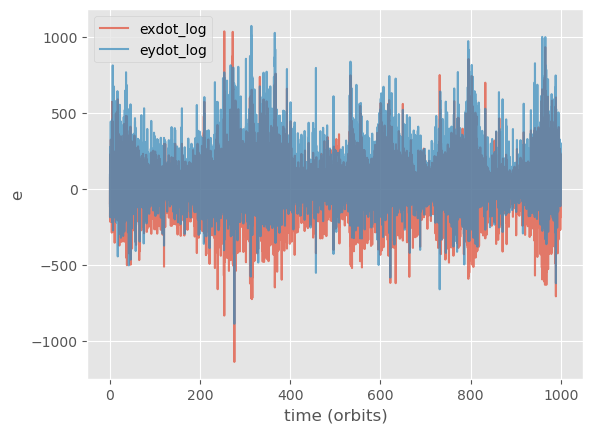

In [45]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), exdot_log, label='exdot_log', alpha=0.7) 
ax.plot(t / ( 2 * np.pi), eydot_log, label='eydot_log', alpha=0.7)
# ax.set_ylim(-1, 1)
ax.set_ylabel('e')
ax.set_xlabel('time (orbits)')
# fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory

In [46]:
ex.min(), ex.max(), ey.min(), ey.max()

(-0.7, 0.20000000000063892, -2.7680343678656476e-10, 2.8855447985687697e-10)

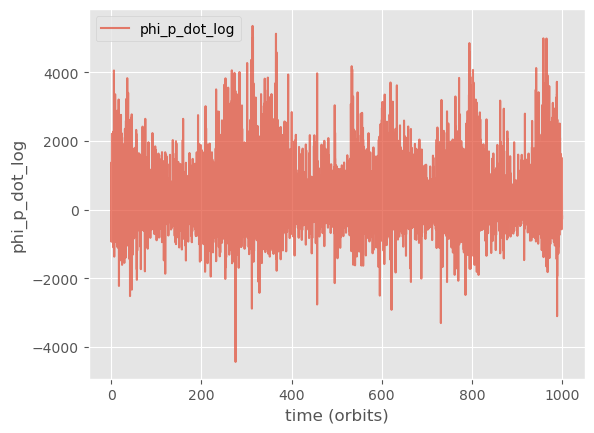

In [47]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), phi_p_dot_log, label='phi_p_dot_log', alpha=0.7) 
ax.set_ylabel('phi_p_dot_log')
ax.set_xlabel('time (orbits)')
# fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory